In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rtas = pd.read_csv("Analisis-taller-de-soporte-informático-_respuestas_.csv",sep=",",engine="python")
del rtas["Marca temporal"]

coso=rtas[rtas["¿Consideras que tu rendimiento por la mañana es peor que por la tarde?"]=="Sí"]

#### Relación rendimiento presencialidad

- ¿Cuáles son las razones por las que el alumno considera que no ha entregado todos los trabajos?


- ¿Tendrá que ver con el lenguaje de programación?¿Cuántos odian python?

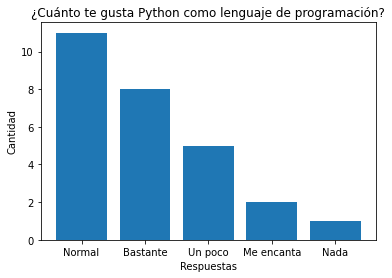

In [10]:
valoresX=rtas["¿Cuánto te gusta Python como lenguaje de programación?"].unique()
valoresY=rtas["¿Cuánto te gusta Python como lenguaje de programación?"].value_counts().tolist()

plt.bar(valoresX,valoresY)
plt.title('¿Cuánto te gusta Python como lenguaje de programación?')
plt.xlabel('Respuestas')
plt.ylabel('Cantidad')
plt.show()

##### Con este gráfco podemos ver que a la mayoria de los alumnos que respondieron la encuesta no les encanta ni odian python.

##### Ahora veamos las demás respuestas de este grupo relacionadas con el análisis de datos y la realización de las tareas

In [12]:
pythonNormal=rtas[rtas["¿Cuánto te gusta Python como lenguaje de programación?"]=="Normal"]

valoresX=rtas["¿Cuánto te gusta Python como lenguaje de programación?"].unique()
valoresY=rtas["¿Cuánto te gusta Python como lenguaje de programación?"].value_counts().tolist()

plt.bar(valoresX,valoresY)
plt.title('¿Cuánto te gusta Python como lenguaje de programación?')
plt.xlabel('Respuestas')
plt.ylabel('Cantidad')
plt.show()

   ¿Pudo entregar todos los trabajos de la materia?  \
0                                                No   
3                                                Sí   
4                                                Sí   
5                                                Sí   
6                                                Sí   
8                                                No   
11                                               No   
15                                               No   
16                                               Sí   
18                                               No   
22                                               No   

   ¿Cuánto te gusta Python como lenguaje de programación?  \
0                                              Normal       
3                                              Normal       
4                                              Normal       
5                                              Normal       
6                                 

- ¿Tendrá que ver con el horario?¿Cuántos consideran que su rendimiento en las primeras horas de la mañana es menor que en la tarde?

- ¿Tendrá que ver con el horario?¿Cuántos consideran que su rendimiento en las primeras horas de la mañana es menor que en la tarde?

- ¿Tendrá que ver con los contenidos?¿Cuántos consideran que analizar datos es aburrido?

- ¿Hasta qué mes del año se han entregado la mayoría los trabajos?


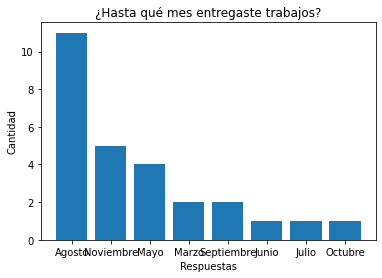

In [11]:
valoresX=rtas["¿Hasta qué mes entregaste trabajos?"].unique()
valoresY=rtas["¿Hasta qué mes entregaste trabajos?"].value_counts().tolist()

plt.bar(valoresX,valoresY)
plt.title('¿Hasta qué mes entregaste trabajos?')
plt.xlabel('Respuestas')
plt.ylabel('Cantidad')
plt.show()

##### Gracias a este gráfico podemos p

- ¿Cuáles son los trabajos correspondientes a ese mes?


- Se podrían realizar muchas más preguntas considerando más posibilidades pero con responder las anteriores será suficiente.



